<a href="https://colab.research.google.com/github/BoringCoderEng/Smart-retail-Product-recommendation/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: Simran Tanger

**Roll no**. 23126049

M=03 W=05

# **🛒Smart Retail Product Recommendation and Customer Segmentation System:**
-------
This project implements a comprehensive machine learning-based system for analyzing customer behavior in a retail environment using transactional data. The system combines regression, classification, and clustering techniques to achieve two main goals: personalized product recommendation and customer segmentation.

The dataset is preprocessed to remove anomalies such as returns and missing customer IDs. Exploratory Data Analysis (EDA) reveals purchasing patterns and high-value customers. A regression model (Linear and Polynomial) predicts customer spending based on purchase behavior. Classification models—including Logistic Regression, SVM, and Naive Bayes—are trained to identify whether customers are likely to purchase specific products like lanterns.

The system also incorporates unsupervised learning techniques such as KMeans, DBSCAN, and hierarchical clustering to group customers by purchasing behavior. Additionally, a K-Nearest Neighbors approach is applied to recommend products based on similar customer profiles

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import numpy as np
with zipfile.ZipFile('/content/drive/MyDrive/archive (9).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/archive (9)')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/archive (9)/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data preprocessing

---



In [ ]:
# Drop missing CustomerIDs and remove rows with nulls
df = df.dropna(subset=['CustomerID'])

# Filter out returns (negative quantities)
df = df[df['Quantity'] > 0]

# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

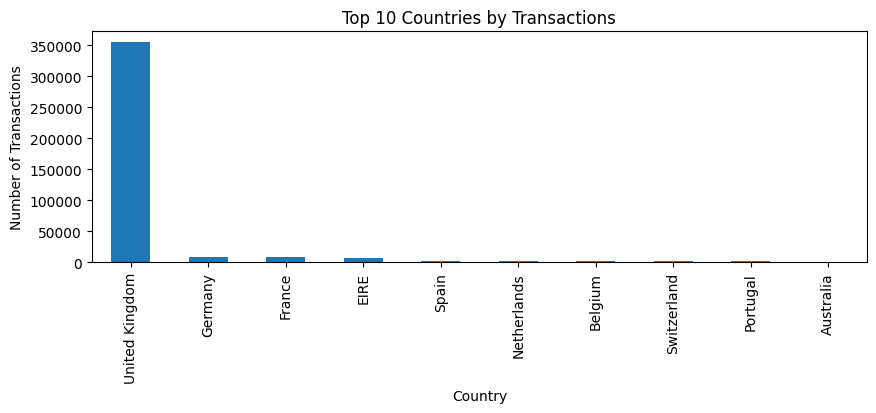

In [ ]:
# Top countries by number of purchases
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Transactions', figsize=(10,3))
plt.ylabel('Number of Transactions')
plt.show()

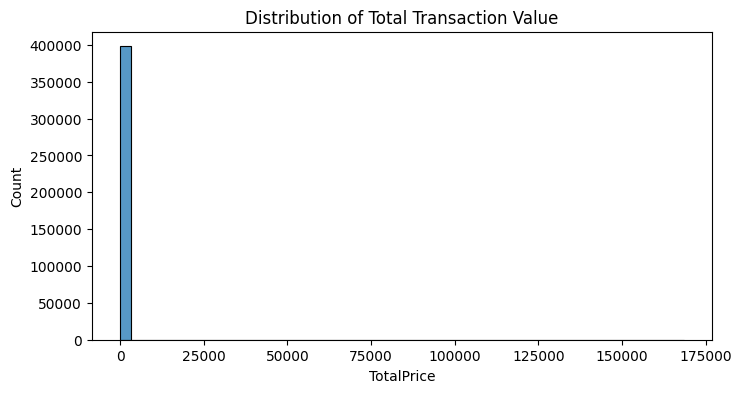

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalPrice'],bins=50)#Divides the data into 50 intervals
plt.title('Distribution of Total Transaction Value')
plt.xlabel('TotalPrice')
plt.show()

From the Above graph we can observe that it is rightly skewed. That means only few number of transactions have very high total prices. So we can use log scaling.

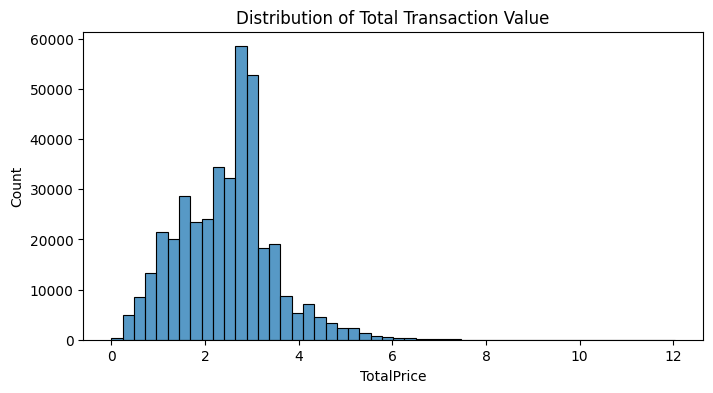

In [ ]:
df['LogTotalPrice'] = np.log1p(df['TotalPrice'])
plt.figure(figsize=(8, 4))
sns.histplot(df['LogTotalPrice'], bins=50) #Bins : gives a relatively detailed view of the data distribution, especially if you have a large dataset with a wide range of values.
plt.title('Distribution of Total Transaction Value')
plt.xlabel('TotalPrice')
plt.show()

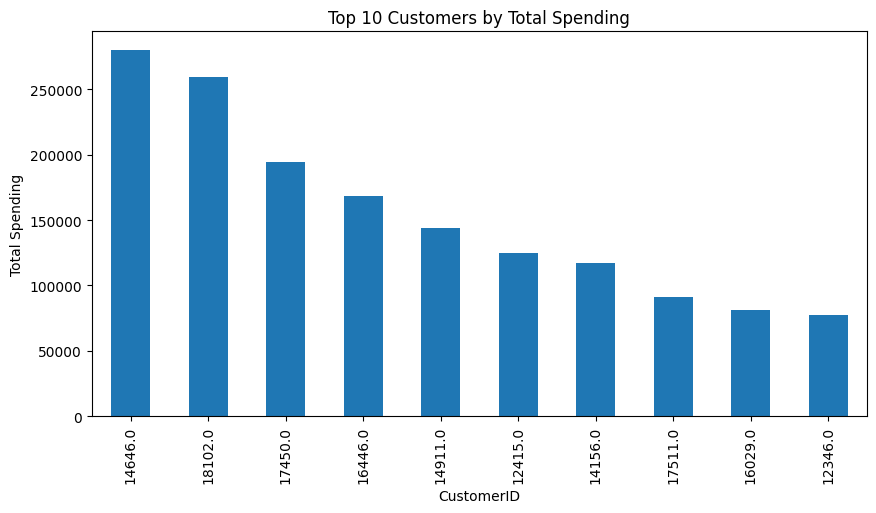

In [ ]:
# Top customers by spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Total Spending', figsize=(10,5))
plt.ylabel('Total Spending')
plt.show()


In [ ]:
# Aggregate data per Customer
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'InvoiceNo': 'NumInvoices',
    'TotalPrice': 'TotalSpending'
}).reset_index()

customer_df.head()


,CustomerID,TotalQuantity,AvgUnitPrice,NumInvoices,TotalSpending
0,12346.0,74215,1.040000,1,77183.60
1,12347.0,2458,2.644011,7,4310.00
2,12348.0,2341,5.764839,4,1797.24
3,12349.0,631,8.289041,1,1757.55
4,12350.0,197,3.841176,1,334.40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define features (X) and target (y)
X = customer_df[['TotalQuantity', 'AvgUnitPrice', 'NumInvoices']]
y = customer_df['TotalSpending']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = lr.predict(X_test)
print("R^2 Score:", lr.score(X_test, y_test))


R^2 Score: 0.6410779230816224


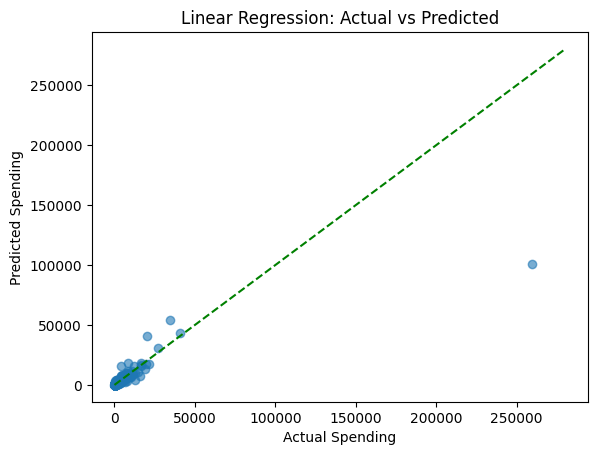

In [ ]:
# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([0, y.max()], [0, y.max()], '--g')
plt.show()
#blue dots accumulating: The majority of customers make relatively low purchases.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Try polynomial degrees 2 and 3
degrees = [2, 3]

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'Polynomial Degree {d} - R^2 Score: {score:.3f}')


Polynomial Degree 2 - R^2 Score: 0.655
Polynomial Degree 3 - R^2 Score: 0.617


In [ ]:
# Create a binary target: Did the customer buy something with 'lantern' in description?
df['IsLantern'] = df['Description'].str.lower().str.contains('lantern')
waterBottle_purchases = df[df['IsLantern']].groupby('CustomerID').size()

# Label customers as 1 if they bought a lantern, else 0
customer_df['BoughtLantern'] = customer_df['CustomerID'].apply(lambda x: 1 if x in waterBottle_purchases else 0)
customer_df['BoughtLantern'].value_counts()


,count
BoughtLantern,
0,3468
1,871


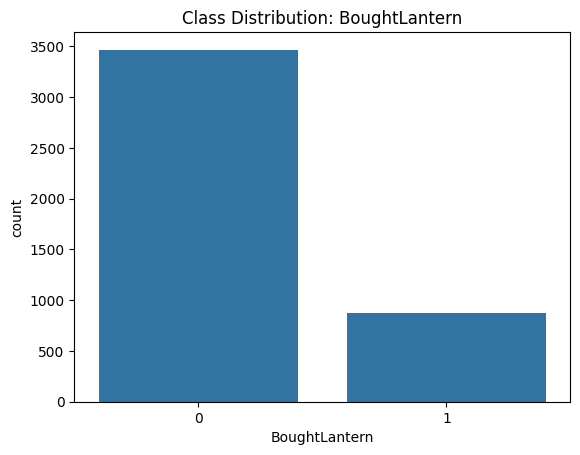

In [ ]:
# Check balance
sns.countplot(x='BoughtLantern', data=customer_df)
plt.title('Class Distribution: BoughtLantern')
plt.show()


# Logistic Regression

---



In [ ]:
# Features and target
X = customer_df[['TotalQuantity', 'AvgUnitPrice', 'NumInvoices']]
y = customer_df['BoughtLantern']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)


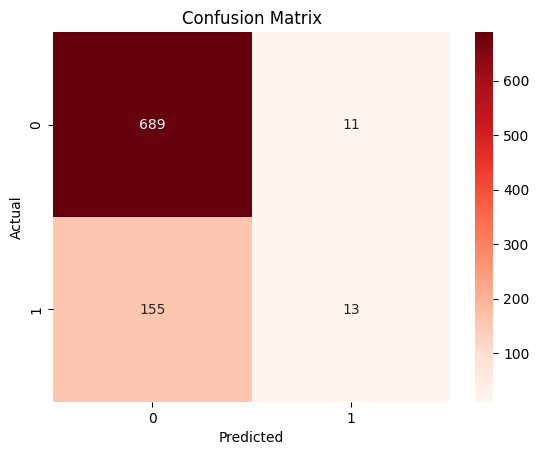

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       700
           1       0.54      0.08      0.14       168

    accuracy                           0.81       868
   macro avg       0.68      0.53      0.51       868
weighted avg       0.76      0.81      0.75       868



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Full classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import IsolationForest

In [ ]:
from sklearn.svm import LinearSVC
#SVM classification
svm = LinearSVC(max_iter=10000)  # Increase max_iter if needed
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       700
           1       0.60      0.07      0.13       168

    accuracy                           0.81       868
   macro avg       0.71      0.53      0.51       868
weighted avg       0.77      0.81      0.75       868



In [ ]:
#Naive-Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluate
print("Naive Bayes Classifier Performance:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier Performance:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       700
           1       0.42      0.38      0.39       168

    accuracy                           0.78       868
   macro avg       0.64      0.62      0.63       868
weighted avg       0.77      0.78      0.77       868



In [ ]:
models = {
    'Logistic Regression': log_reg,
    'SVM': svm,
    'Naive Bayes': nb
}

for name, model in models.items():
    print(f'---{name} ---')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


---Logistic Regression ---
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       700
           1       0.54      0.08      0.14       168

    accuracy                           0.81       868
   macro avg       0.68      0.53      0.51       868
weighted avg       0.76      0.81      0.75       868

---SVM ---
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       700
           1       0.60      0.07      0.13       168

    accuracy                           0.81       868
   macro avg       0.71      0.53      0.51       868
weighted avg       0.77      0.81      0.75       868

---Naive Bayes ---
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       700
           1       0.42      0.38      0.39       168

    accuracy                           0.78       868
   macro avg       0.64      0.62      0.63       868
weighted avg     

In [ ]:
# Pivot table: Rows = customers, Columns = products, Values = quantity
#created a excel type table
pivot = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

pivot.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Clustering technique

---



In [ ]:
# Normalize data
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(pivot_scaled, customer_df['BoughtLantern'])  # Can be any target label


KNeighborsClassifier(metric='cosine')

In [ ]:
# Pick a random customer
random_customer_index = np.random.randint(0, pivot_scaled.shape[0])
customer_vector = pivot_scaled[random_customer_index].reshape(1, -1)

# Find similar customers
distances, indices = knn.kneighbors(customer_vector)

# Show similar customers
print(f"Customers similar to Customer ID: {pivot.index[random_customer_index]}")
print(pivot.index[indices[0]])

Customers similar to Customer ID: 17649.0
Index([17649.0, 14655.0, 18227.0, 16697.0, 13806.0], dtype='float64', name='CustomerID')


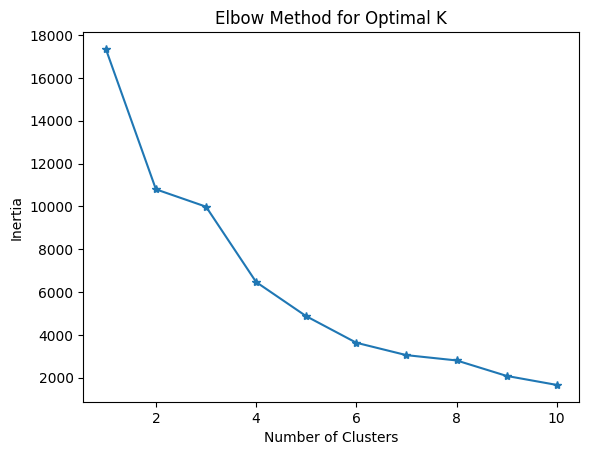

In [ ]:
# Use customer features for segmentation
features = customer_df[['TotalQuantity', 'AvgUnitPrice', 'NumInvoices', 'TotalSpending']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow Method to choose K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='*')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


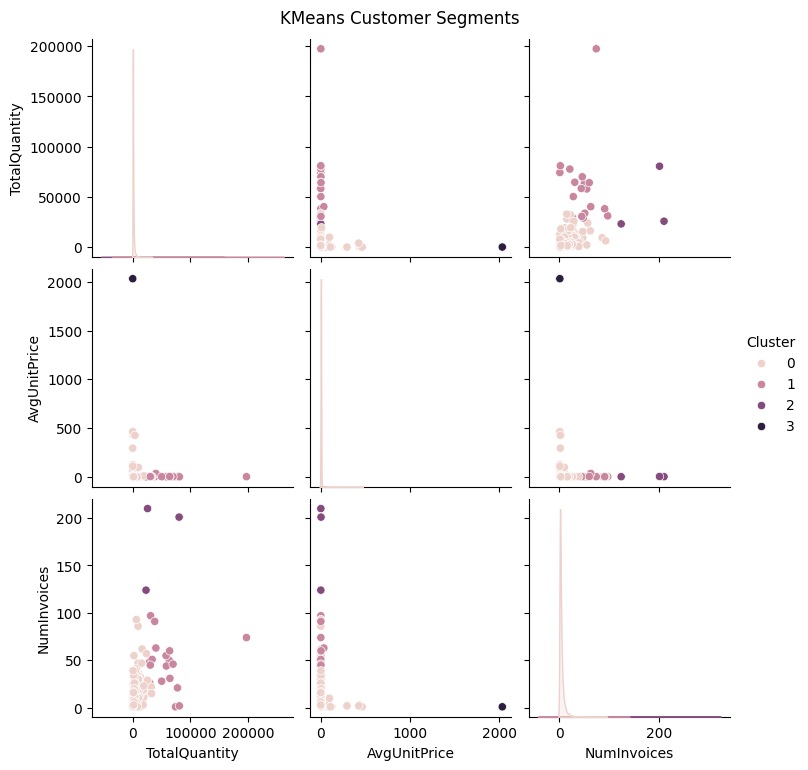

In [ ]:
# Apply KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
sns.pairplot(customer_df, hue='Cluster', vars=['TotalQuantity', 'AvgUnitPrice', 'NumInvoices'])
plt.suptitle('KMeans Customer Segments', y=1.02)
plt.show()


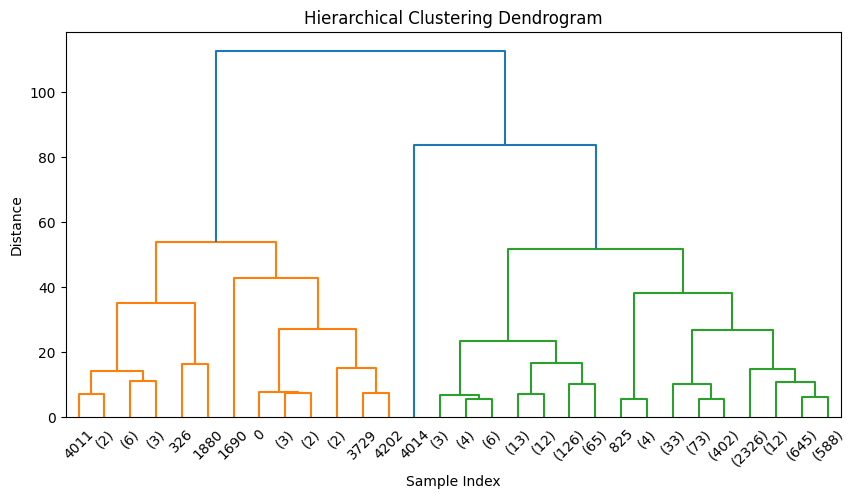

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
linked = linkage(features_scaled, method='ward')#linkage matrix (a matrix that describes the relationships between clusters).
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(features_scaled)
customer_df['Hierarchical_Cluster'] = hierarchical_labels
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


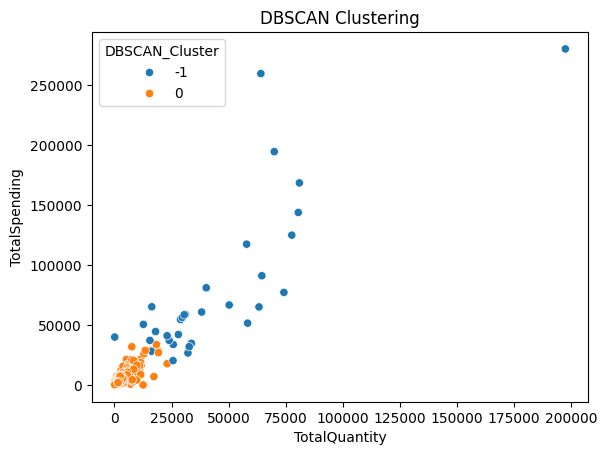

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(features_scaled)

customer_df['DBSCAN_Cluster'] = db_labels
sns.scatterplot(x='TotalQuantity', y='TotalSpending', hue='DBSCAN_Cluster', data=customer_df, palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()


# Dimensionality Reduction

---



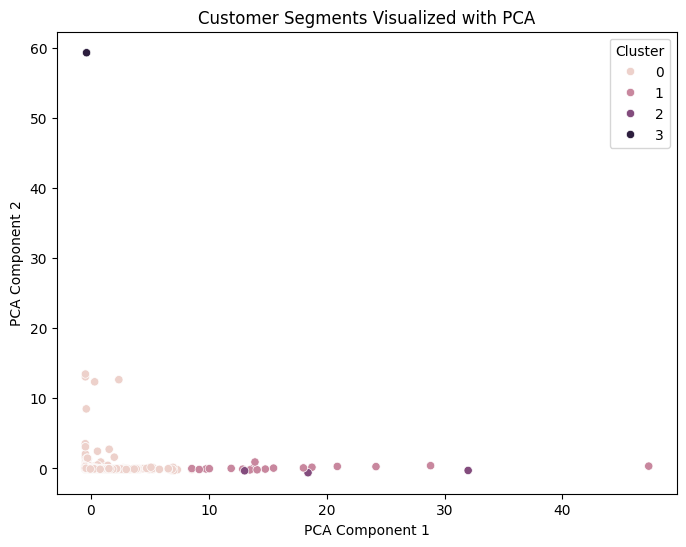

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_df['Cluster'])
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


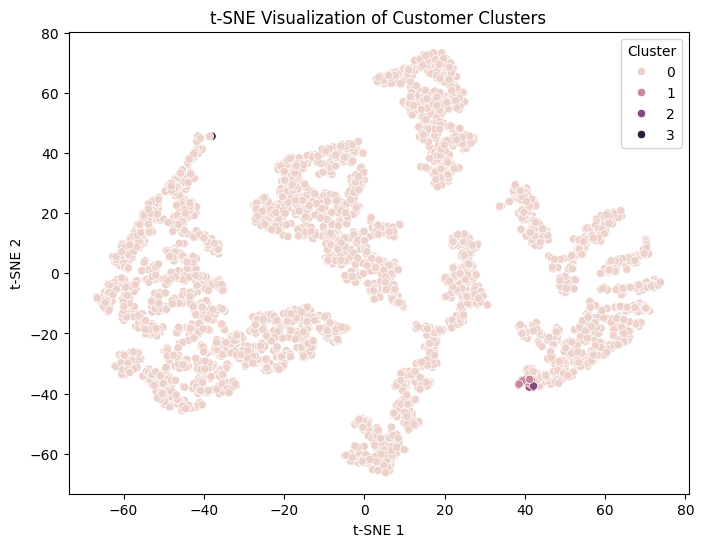

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)#a hyperparameter controlling how to balance local vs global structure. Changing it can affect your visualization.
                                                          #low perplexity :Focuses more on local clusters, good for zooming into small patterns.Might miss broader structure.
                                                          #High perplexity :Captures more global structure, but may blur smaller clusters.
tsne_results = tsne.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=customer_df['Cluster'])
plt.title('t-SNE Visualization of Customer Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
